# Probabilities of dice totals
plots the probability distribution of the eye-total of arbitrary many, arbitrary-sided dice

In [1]:
import itertools
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator

## input: sides of dice

In [2]:
dice = [6, 6, 20]

## calculation
- list of lists of all possible eyes for each die:

In [3]:
eyes = [ [eye+1 for eye in range(die)] for die in dice ]
print(eyes)

[[1, 2, 3, 4, 5, 6], [1, 2, 3, 4, 5, 6], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]


- all possible result combinations

In [4]:
combinations = list(itertools.product(*eyes))

- eye-total for each combination

In [5]:
eyesum = [sum(combination) for combination in combinations]

- probability distribution

In [6]:
N = np.histogram(eyesum, bins = np.arange(min(eyesum), min(eyesum) + len(set(eyesum)) + 1), density=True)

## plot probability distribution

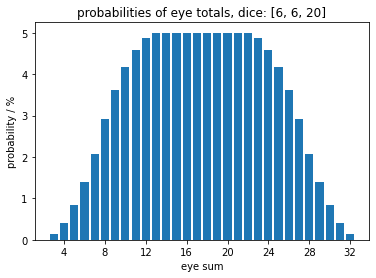

In [8]:
ax = plt.figure().gca()
plt.bar(N[1][:-1], N[0]*100, width=0.8)
plt.title(f'probabilities of eye totals, dice: {dice}')
plt.xlabel('eye sum')
plt.ylabel('probability / %')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))   # integer ticks